Notebook initialization:

You need to run the next 3 cells!

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math

Esthetic definitions for the plots

In [2]:
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

Common settings for cosmological parameters and other CLASS parameters

In [3]:
common_settings = {
                   'output':'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'h':0.67556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   'A_s':2.215e-9,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
                   'mass function' : 'T08M200c',
}


p18_cosmo = {
    
     # P18 1st column table 1 of https://arxiv.org/pdf/1807.06209.pdf
    'omega_b': 0.022383,
    'omega_cdm': 0.12011,
    'h': 0.6732,
    'tau_reio': 0.0543,
    'ln10^{10}A_s': 3.0448,
    'n_s': 0.96605,
    'k_pivot': 0.05,
    'N_ncdm': 1,
    'N_ur': 2.0328,
    'm_ncdm': 0.06
}


gil_marin = {
    'h':0.7,
    'omega_b': 0.023,
    'omega_cdm': 0.1093,
    'n_s':0.95,
    'sigma8': 0.7913,
    'tau_reio': 0.0543,
}

simone = {}

lazanu = {
    'h':0.71,
    'omega_b': 0.0226,
    'omega_cdm': 0.11,
    'n_s':0.963,
    'A_s': 2.43e-9,
    'k_pivot': 0.002,
}

planck_2015 = {
    'omega_b' : 0.02226,
    'omega_cdm' : 0.1186,
    'A_s':  2.139e-9,
    'k_pivot': 0.05,
    'n_s': 0.9677,
    'h' : 0.6781
}

battaglia_16 = {
    'h':0.72,
    'Omega_b':0.043,
    'Omega_cdm':0.25-0.043,
    'n_s':0.96,
    'sigma8':0.8
    
}


z_for_pk_hm = 1.
M_min = 1e8
k_max_for_pk_class_sz = 1e2
z_max = 4.

pk_setup = {
'output': 'pk_at_z_1h,pk_at_z_2h,mPk,pk_gg_at_z_1h,pk_gg_at_z_2h',
'M_min' : M_min,
'm_min_counter_terms' : M_min,
'M_max' : 1e17,
'hm_consistency' : 1,
'z_min' : 1.e-6,
'z_max' : 4.,

"dlnk_for_pk_hm" : 0.01,
"z_for_pk_hm" : z_for_pk_hm,
"z_pk" : z_for_pk_hm ,
"k_min_for_pk_hm" : 1e-4,
"k_max_for_pk_hm" : 2e1,
    
}

factor_sz = 1e-2

# connection between pressure profiles and y-m relations

In [4]:
M = Class()
cosmo_settings = {
                  'omega_cdm': 0.125,
                  'omega_b': 0.0224,
                  'A_s': 1.9e-9,
                  'n_s': 0.96,
                  'H0': 70.,
                  'tau_reio': 0.054, # planck 2018 value (in abstract of 1807.06209)
                  'YHe': 'BBN',

                  # 1 massive neutrino (planck 2018 baseline)
                  'N_ur': 2.0328,
                  'N_ncdm': 1,
                  'm_ncdm': 0.06,
                  'T_ncdm': 0.71611,
                   
                  'M_max': 5e16,


                  # X ray mass bias (if applicable)
                  'B' : 1.,
                  'output' : 'tSZ_1h,m200c_to_m500c,m500c_to_m200c',
                  'pressure profile': 'Custom. GNFW',
                  'P0GNFW': 8.403,
                  'c500':1.177,
                  'gammaGNFW':0.3081,
                  'alphaGNFW':1.0510,
                  'betaGNFW':5.4905
}

M.set(cosmo_settings)
M.compute()

Text(0.5, 0, 'angular size $\\theta = r/d_A$ in arcmin')

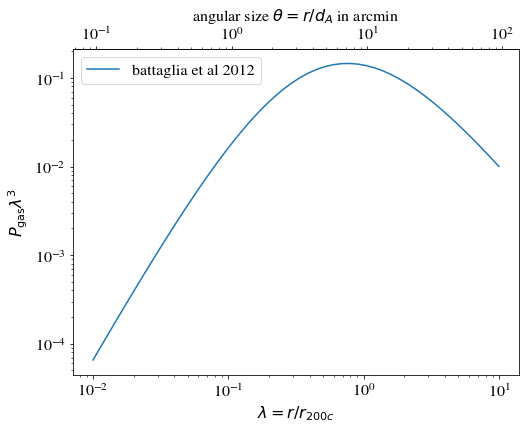

In [21]:
# chose a mass and redshift for a given halo of interest
z = 0.1
m200c = 1e14

# load the profile formula and vectorize:
vec_get_dy_classy_battaglia = np.vectorize(M.get_1e6xdy_from_battaglia_pressure_at_x_z_and_m200c)

# define array of x=r/r200c:
x_arr = np.geomspace(1e-2,1e1)
x_200c = x_arr

# dimensonfull radial array:
r200c = M.get_r_delta_of_m_delta_at_z(200,m200c,z)
r = x_200c*r200c
theta_arcmin = M.get_rad_to_arcmin(r/M.get_dA(z))

def x200c_to_theta_arcmin(X):
    return M.get_rad_to_arcmin(r200c*X/M.get_dA(z))
def theta_arcmin_to_x200c(X):
    theta_rad = M.get_arcmin_to_rad(X)
    r = M.get_dA(z)*theta_rad
    return r/r200c

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(x_arr,vec_get_dy_classy_battaglia(x_arr,z,m200c)*x_arr**3.,label='battaglia et al 2012')
ax1.loglog()
ax1.legend()
ax1.set_xlabel(r'$\lambda=r/r_{200c}$')
ax1.set_ylabel(r'$P_\mathrm{gas}\lambda^3$')

secax = ax1.secondary_xaxis('top', functions=(x200c_to_theta_arcmin, theta_arcmin_to_x200c))

secax.set_xlabel(r'angular size $\theta = r/d_A$ in arcmin')




In [11]:
M.struct_cleanup()
M.empty()